In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
#import data
data = pd.read_csv("combine_data_with_labels_new.csv")

In [3]:
#X - Weather Variables, Y - Classification Label
X = data[['HourlyDewPointTemperature', 'HourlyPrecipitation', 
          'HourlyRelativeHumidity','HourlySeaLevelPressure','HourlyStationPressure',
          'HourlyVisibility','HourlyWindSpeed']]
Y = data['Label1']

In [4]:
#train/test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [5]:
#create classifier
clf = RandomForestClassifier()


In [6]:
#train and fit model
clf.fit(X_train, Y_train)

RandomForestClassifier()

In [7]:
#prediction
prediction = clf.predict(X_test)

In [8]:
#accuracy
print("Accuracy:", metrics.accuracy_score(Y_test, prediction))

Accuracy: 0.9874448532617225


In [9]:
print(metrics.confusion_matrix(Y_test, prediction))

[[  7730   4293]
 [  2187 501913]]


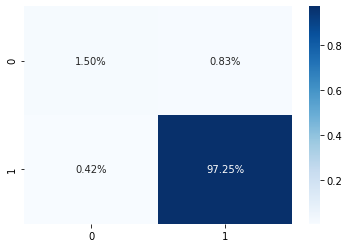

In [10]:
#confusion matrix
confusion_matrix = metrics.confusion_matrix(Y_test, prediction)
sns.heatmap(confusion_matrix/np.sum(confusion_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

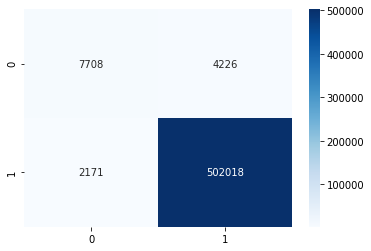

In [15]:
sns.heatmap(confusion_matrix, annot=True, 
            fmt='1', cmap='Blues')

Text(0.5, 1, 'Confusion Matrix')

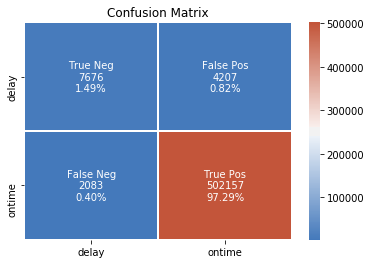

In [21]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ['{0:0.0f}'.format(value) for value in
                confusion_matrix.flatten()]
group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion_matrix.flatten()/np.sum(confusion_matrix)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
xticks = ["delay", "ontime"]
yticks = ["delay", "ontime"]
sns.heatmap(confusion_matrix, 
            annot=labels, 
            fmt='',
            xticklabels = xticks, 
            yticklabels = yticks,
            cmap = sns.diverging_palette(250, 20, as_cmap=True), 
            linecolor="white", 
            linewidth=1).set_title("Confusion Matrix")

In [15]:
#classification report
print("Classification report:\n", metrics.classification_report(Y_test, prediction))

Classification report:
               precision    recall  f1-score   support

       delay       0.79      0.65      0.71     11883
      ontime       0.99      1.00      0.99    504240

    accuracy                           0.99    516123
   macro avg       0.89      0.82      0.85    516123
weighted avg       0.99      0.99      0.99    516123



In [24]:
classification = metrics.classification_report(Y_test, prediction)

In [88]:
def heatmap(AUC, title, xlabel, ylabel, xticklabels, yticklabels, figure_width=40, figure_height=20, correct_orientation=False, cmap='RdBu'):

    # Plot it out
    fig, ax = plt.subplots()
    #c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, cmap='RdBu', vmin=0.0, vmax=1.0)
    c = ax.pcolor(AUC, edgecolors='k', linestyle= 'dashed', linewidths=0.2, alpha=0.7, cmap=cmap)

    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(AUC.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(AUC.shape[1]) + 0.5, minor=False)

    # set tick labels
    #ax.set_xticklabels(np.arange(1,AUC.shape[1]+1), minor=False)
    ax.set_xticklabels(xticklabels, minor=False)
    ax.set_yticklabels(yticklabels, minor=False)

    # set title and x/y labels
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    # Remove last blank column
    plt.xlim( (0, AUC.shape[1]) )

    # Turn off all the ticks
    ax = plt.gca()
    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False

    # Add color bar
    plt.colorbar(c)

    # Add text in each cell 
    show_values(c)

    # Proper orientation (origin at the top left instead of bottom left)
    if correct_orientation:
        ax.invert_yaxis()
        ax.xaxis.tick_top()

    # resize 
    fig = plt.gcf()
    #fig.set_size_inches(cm2inch(40, 20))
    #fig.set_size_inches(cm2inch(404, 204))
    fig.set_size_inches(cm2inch(figure_width, figure_height))

In [70]:
def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    '''
    Plot scikit-learn classification report.
    Extension based on https://stackoverflow.com/a/31689645/395857 
    '''
    lines = classification_report.split('\n')

    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 4)]:
        t = line.strip().split()
        if len(t) < 2: 
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)

    print('plotMat: {0}'.format(plotMat))
    print('support: {0}'.format(support))

    xlabel = 'Metrics'
    ylabel = 'Classes'
    xticklabels = ['Precision', 'Recall', 'F1-score']
    yticklabels = ['{0} ({1})'.format(class_names[idx], sup) for idx, sup  in enumerate(support)]
    figure_width = 25
    figure_height = len(class_names) + 7
    correct_orientation = False
    heatmap(np.array(plotMat), title, xlabel, ylabel, xticklabels, yticklabels, figure_width, figure_height, correct_orientation, cmap=cmap)

In [67]:
def cm2inch(*tupl):
    inch = 2.54
    if type(tupl[0]) == tuple:
        return tuple(i/inch for i in tupl[0])
    else:
        return tuple(i/inch for i in tupl)

In [68]:
def show_values(pc, fmt="%.2f", **kwargs):
    '''
    Heatmap with text in each cell with matplotlib's pyplot
    Source: https://stackoverflow.com/a/25074150/395857 
    By HYRY
    '''
    pc.update_scalarmappable()
    #ax = pc.get_axes()
    ax = pc.axes# FOR LATEST MATPLOTLIB
    #Use zip BELOW IN PYTHON 3
    for p, color, value in zip(pc.get_paths(), pc.get_facecolors(), pc.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        if np.all(color[:3] > 0.5):
            color = (0.0, 0.0, 0.0)
        else:
            color = (1.0, 1.0, 1.0)
        ax.text(x, y, fmt % value, ha="center", va="center", color=color, **kwargs)

[0.78, 0.65, 0.71]
[0.99, 1.0, 0.99]
plotMat: [[0.78, 0.65, 0.71], [0.99, 1.0, 0.99]]
support: [11934, 504189]


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:31: MatplotlibDeprecationWarning: 
The tick1On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick1line.set_visible instead.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:32: MatplotlibDeprecationWarning: 
The tick2On function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use Tick.tick2line.set_visible instead.


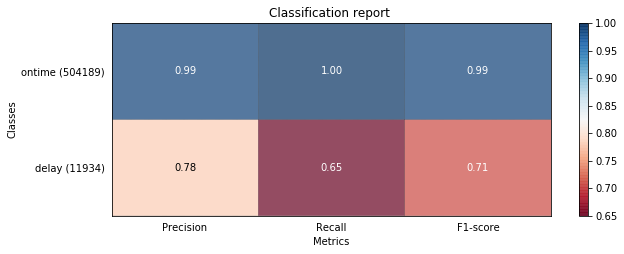

In [89]:
plot_classification_report(classification, cmap='RdBu')

In [ ]:
def plot_classification_report(classification_report, title='Classification report ', cmap='RdBu'):
    classes = []
    plotMat = []
    support = []
    class_names = []
    for line in lines[2 : (len(lines) - 4)]:
        t = line.strip().split()
        if len(t) < 2: 
            continue
        classes.append(t[0])
        v = [float(x) for x in t[1: len(t) - 1]]
        support.append(int(t[-1]))
        class_names.append(t[0])
        print(v)
        plotMat.append(v)
    return classes

In [ ]:
classification_rpt = plot_classification_report(classification)

In [22]:
import seaborn as sns
import numpy as np
from sklearn.metrics import precision_recall_fscore_support
import matplotlib.pyplot as plt

#y = np.random.randint(low=0, high=10, size=100)
#y_p = np.random.randint(low=0, high=10, size=100)

def plot_classification_report(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['precision', 'recall', 'f1-score']
    yticks = list(np.unique(y_tru))
    #yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep[0:-1,0:-1],
                annot=True, 
                cbar=True, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
                cmap = sns.diverging_palette(250, 20, as_cmap=True),
                linecolor="white",
                linewidth=1).set_title("Classification Report")

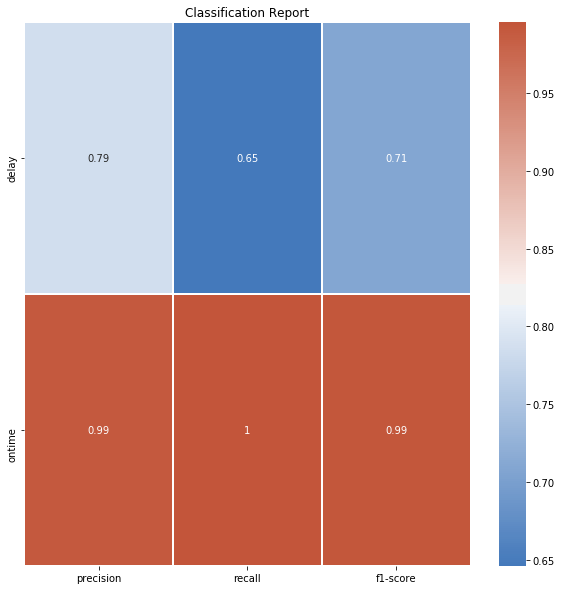

In [23]:
plot_classification_report(Y_test, prediction)

In [24]:
def plot_support(y_tru, y_prd, figsize=(10, 10), ax=None):

    plt.figure(figsize=figsize)

    xticks = ['support']
    yticks = list(np.unique(y_tru))
    #yticks += ['avg']

    rep = np.array(precision_recall_fscore_support(y_tru, y_prd)).T
    avg = np.mean(rep, axis=0)
    avg[-1] = np.sum(rep[:, -1])
    rep = np.insert(rep, rep.shape[0], avg, axis=0)

    sns.heatmap(rep[0:-1,-1:],
                annot=True, 
                cbar=True, 
                xticklabels=xticks, 
                yticklabels=yticks,
                ax=ax,
                fmt="",
                cmap = sns.diverging_palette(250, 20, as_cmap=True),
                linecolor="white",
                linewidth=1).set_title("Support")

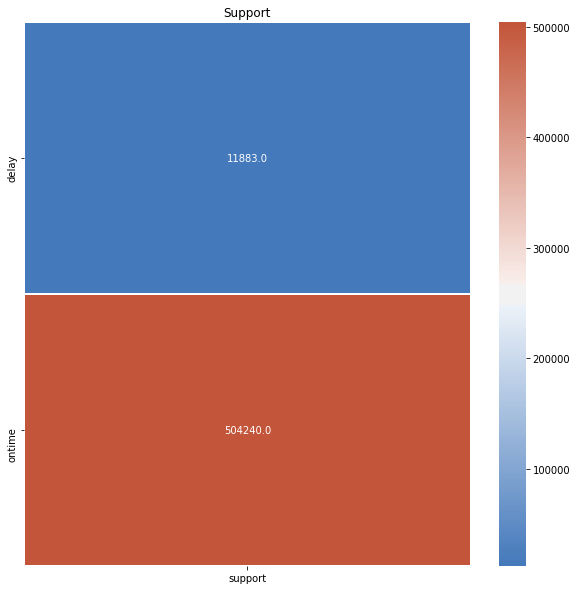

In [25]:
plot_support(Y_test, prediction)

In [16]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')

In [17]:
importances.head(15)

,importance
feature,
HourlyDewPointTemperature,0.194
HourlyStationPressure,0.176
HourlyPrecipitation,0.171
HourlySeaLevelPressure,0.150
HourlyRelativeHumidity,0.121
HourlyWindSpeed,0.115
HourlyVisibility,0.074


Text(0.5, 1.0, 'Feature Importance')

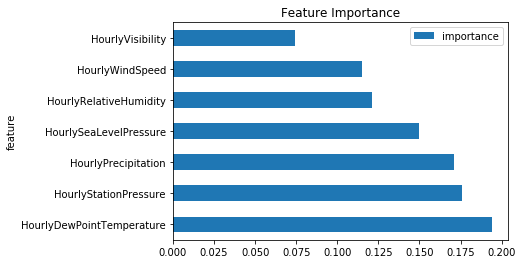

In [18]:
importances.plot.barh().set_title("Feature Importance")


           delay    ontime
delay   0.642934  0.357066
ontime  0.004338  0.995662


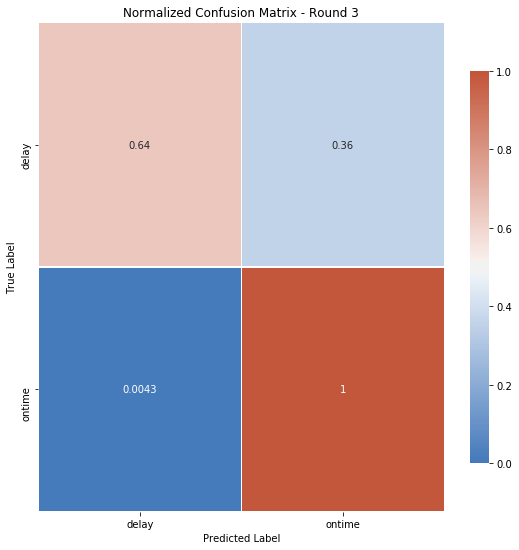

In [12]:
cf_neu = confusion_matrix.astype('float') / confusion_matrix.sum(axis=1)[:, np.newaxis]
conf_matrix = pd.DataFrame(cf_neu,
                           index=['delay', 'ontime'],
                           columns=['delay', 'ontime'])
print(conf_matrix)

plt.subplots(figsize=(8, 8))
heat_map = sns.heatmap(conf_matrix,
                       cmap=sns.diverging_palette(250, 20, as_cmap=True),
                       annot=True,
                       vmax=1,
                       vmin=0,
                       center=0.5,
                       square=False,
                       linewidths=.3,
                       cbar_kws={"shrink": .8})
heat_map.figure.tight_layout()
heat_map.figure.subplots_adjust(top=.95, bottom=0.1, left=0.1)
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.title('Normalized Confusion Matrix - Round 3')
plt.show()